Using TensorFlow backend.


Done Testing!


Test Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

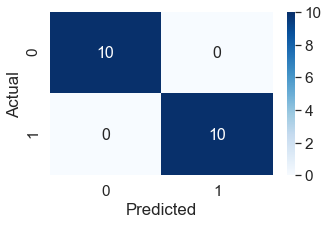

In [1]:
from keras.models import load_model
import cv2
import numpy as np
import sys
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import fnmatch
import os
%matplotlib inline

CATEGORY = {
    0: "up",
    1: "down"
}

# Vetor de respostas. Armazena as respostas corretas.
actual = [1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1]

# Vetor que armazena as predições.
predict = []

# Mapeia os gestos para o equivalente em número
def mapping(val):
    return CATEGORY[val]

# Carrega o modelo treinado
model = load_model("treinamento_gestos.h5")

# Conta a quantidade de arquivos .jpg do diretório
dir = 'C:/Users/eduar/Reconhecimento de Gestos/Untitled Folder/test_images/test_images'
count_of_img = len(fnmatch.filter(os.listdir(dir), '*.jpg'))

# Loop para testar cada imagem da pasta dir
for i in range(count_of_img):
    # Caminho onde estão as imagens salvas para teste
    filepath = 'C:/Users/eduar/Reconhecimento de Gestos/Untitled Folder/test_images/test_images/{}.jpg'.format(i)

    # Ajustar imagem para que tenha as mesmas dimensões da imagem de treino
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (225, 225))

    # Faz a predição do gesto da imagem
    prediction = model.predict(np.array([image]))

    # Passa a predição para valor
    gesture_value = np.argmax(prediction[0])
    
    # Mapeia o gesto para valor
    gesture_name = mapping(gesture_value)
    
    # Salva o resultado numérico em um vetor para comparação
    predict.append(gesture_value)

print("Done Testing!")    

# Plot do Classificasion Report
report = classification_report(actual, predict)
print("\n")
print("Test Report:")
print(report)

# Plota a matriz de confusao
confusion_matrix(actual, predict)
data = confusion_matrix(actual, predict)
df_cm = pd.DataFrame(data, columns=np.unique(actual), index = np.unique(actual))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size